# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observation 1: Southern Hemisphere climates tend to be slightly milder than those at similar latitudes in the Northern Hemisphere. This is because the Southern Hemisphere has significantly more ocean and much less land; water heats up and cools down more slowly than land.

Observation 2: Highest temperature is found at 0 latitude and as the latidude increases or decreases, temperature drops. This happens as equatorial region receives sunlight straight with less or no angle due to curvature shape of earth.

Observation 3: Latitude doesn't have a strong iinfluence on wind speed. The speed of the wind is controlled by the strength of the air pressure gradient, the stronger the pressure gradient the higher the wind speed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : kununurra
Processing Record 2 of Set 1 : smithers
Processing Record 3 of Set 1 : hithadhoo
Processing Record 4 of Set 1 : murray bridge
Processing Record 5 of Set 1 : thompson
Processing Record 6 of Set 1 : butaritari
Processing Record 7 of Set 1 : jamestown
Processing Record 8 of Set 1 : bluff
City not found. Skipping...
Processing Record 9 of Set 1 : aykhal
Processing Record 10 of Set 1 : san patricio
Processing Record 11 of Set 1 : kholodnyy
City not found. Skipping...
Processing Record 12 of Set 1 : pechora
Processing Record 13 of Set 1 : kungurtug
Processing Record 14 of Set 1 : hamilton
Processing Record 15 of Set 1 : ushuaia
Processing Record 16 of Set 1 : cherskiy
Processing Record 17 of Set 1 : ancud
Processing Record 18 of Set 1 : usinsk
Processing Record 19 of Set 1 : ouesso
Processing Record 20 of Set 1 : esperance
Processing Record 21 of Set 1 : istok
City not found. Skipping...
Processi

Processing Record 28 of Set 4 : qaanaaq
Processing Record 29 of Set 4 : georgetown
Processing Record 30 of Set 4 : soyo
Processing Record 31 of Set 4 : kushima
Processing Record 32 of Set 4 : salinas
Processing Record 33 of Set 4 : las choapas
Processing Record 34 of Set 4 : bahar
Processing Record 35 of Set 4 : saryozek
Processing Record 36 of Set 4 : ostroleka
Processing Record 37 of Set 4 : itoman
Processing Record 38 of Set 4 : fort nelson
City not found. Skipping...
Processing Record 39 of Set 4 : mae ramat
Processing Record 40 of Set 4 : altona
Processing Record 41 of Set 4 : saskylakh
Processing Record 42 of Set 4 : crawfordsville
City not found. Skipping...
Processing Record 43 of Set 4 : oranjemund
Processing Record 44 of Set 4 : lindsay
Processing Record 45 of Set 4 : necochea
Processing Record 46 of Set 4 : peto
Processing Record 47 of Set 4 : pinega
Processing Record 48 of Set 4 : margate
Processing Record 49 of Set 4 : baruun-urt
Processing Record 50 of Set 4 : clyde river

Processing Record 15 of Set 8 : kupang
Processing Record 16 of Set 8 : paamiut
Processing Record 17 of Set 8 : muscat
Processing Record 18 of Set 8 : kahului
Processing Record 19 of Set 8 : beloha
Processing Record 20 of Set 8 : berlevag
Processing Record 21 of Set 8 : kawalu
Processing Record 22 of Set 8 : szprotawa
Processing Record 23 of Set 8 : katangli
Processing Record 24 of Set 8 : ayorou
Processing Record 25 of Set 8 : leningradskiy
Processing Record 26 of Set 8 : cayenne
Processing Record 27 of Set 8 : cookeville
Processing Record 28 of Set 8 : richards bay
Processing Record 29 of Set 8 : pangai
Processing Record 30 of Set 8 : iqaluit
Processing Record 31 of Set 8 : blagoyevo
Processing Record 32 of Set 8 : lazaro cardenas
City not found. Skipping...
Processing Record 33 of Set 8 : sturgeon falls
Processing Record 34 of Set 8 : mumbwa
City not found. Skipping...
Processing Record 35 of Set 8 : adeje
Processing Record 36 of Set 8 : mojo
Processing Record 37 of Set 8 : sao joao 

Processing Record 50 of Set 11 : alekseyevka
City not found. Skipping...
Processing Record 0 of Set 12 : honningsvag
Processing Record 1 of Set 12 : sistranda
Processing Record 2 of Set 12 : namibe
Processing Record 3 of Set 12 : alugan
Processing Record 4 of Set 12 : beihai
Processing Record 5 of Set 12 : mouila
Processing Record 6 of Set 12 : aswan
Processing Record 7 of Set 12 : manzhouli
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [6]:
# Count data
weather_dict.count()

City          568
Cloudiness    568
Country       568
Date          568
Humidity      568
Lat           568
Lng           568
Max Temp      568
Wind Speed    568
dtype: int64

In [7]:
# Display the Data Frame
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kununurra,100,AU,1612649213,100,-15.7667,128.7333,78.80,3.38
1,Smithers,90,CA,1612649494,93,54.7804,-127.1743,26.60,2.77
2,Hithadhoo,9,MV,1612649494,75,-0.6000,73.0833,81.55,11.21
3,Murray Bridge,79,AU,1612649409,93,-35.1167,139.2667,57.99,12.24
4,Thompson,75,CA,1612649307,62,55.7435,-97.8558,-25.60,11.50
...,...,...,...,...,...,...,...,...,...
563,Alugan,66,PH,1612649555,86,12.2188,125.4808,79.75,14.12
564,Beihai,3,CN,1612649555,90,21.4833,109.1000,65.07,7.09
565,Mouila,96,GA,1612649555,93,-1.8685,11.0559,74.79,3.02
566,Aswān,0,EG,1612649555,47,24.0934,32.9070,59.25,5.84


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

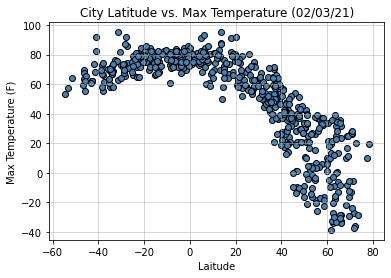

In [8]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (02/03/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

In [9]:

#Highest temperature is found at 0 latitude and as the latidude increases or decreases, temperature drops.

## Latitude vs. Humidity Plot

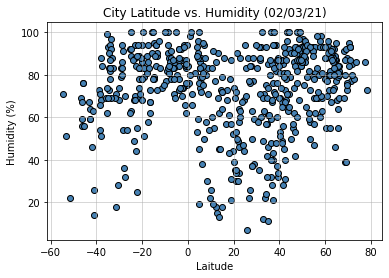

In [10]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (02/03/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

In [11]:
#Polar regions have lower humidity and as latitude gets higher,humidity gets higher in southern hemisphere.

## Latitude vs. Cloudiness Plot

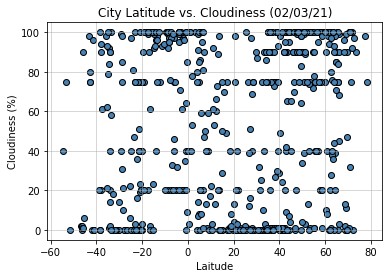

In [12]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (02/03/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

In [13]:
#Cloudiness data is widely spread across the latitude

## Latitude vs. Wind Speed Plot

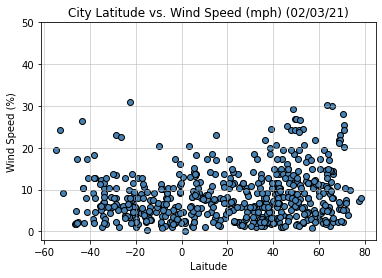

In [14]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (02/03/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

In [15]:
#Wind speed data is widely spread across the latitude.

## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [17]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.85


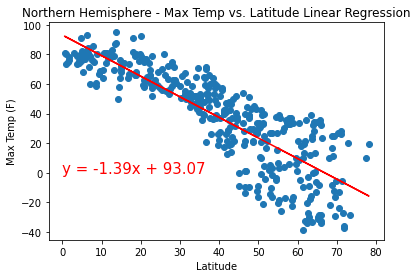

In [18]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

In [19]:
#There is a strong negative correlation between latitude and max temperature for northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.56


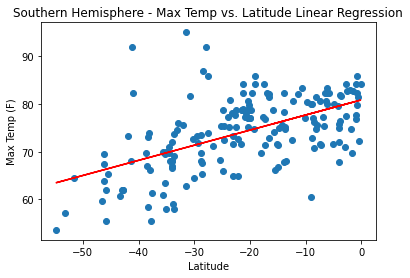

In [20]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

In [21]:

#There is a moderate positive correlation between latitude and max temperature for southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.29


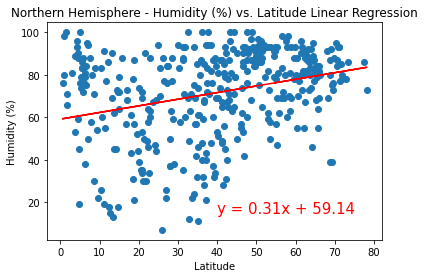

In [22]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

In [23]:
#There is a moderate positive correlation between latitude and humidity for northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.41


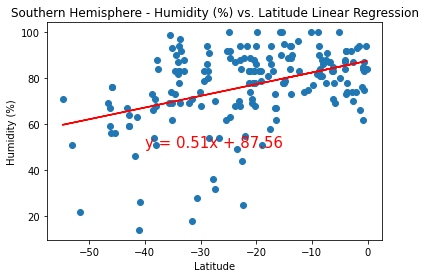

In [24]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

In [25]:
#There is a moderate positive correlation between latitude and humidity for southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.26


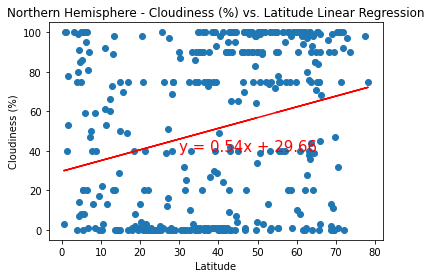

In [26]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [27]:
#There is a weak positive correlation between latitude and cloudiness for northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.29


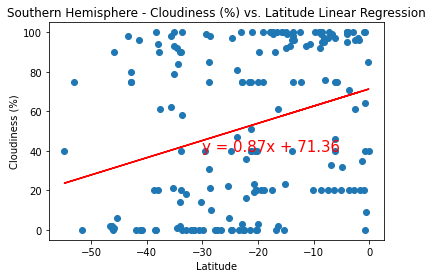

In [28]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [29]:
#There is a moderate positive correlation between latitude and cloudiness for southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.17


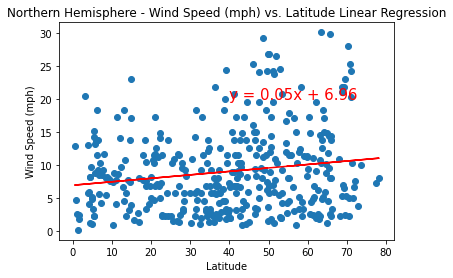

In [30]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

In [31]:
#There is a weak positive correlation between latitude and windspeed for northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.21


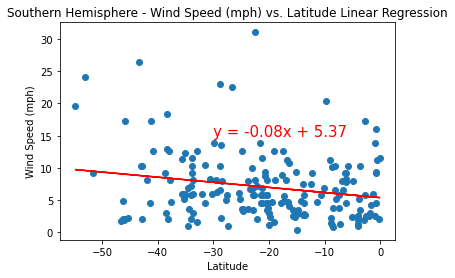

In [32]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

In [33]:
#There is a weak negative correlation between latitude and wind speed for southern hemisphere.